# Setup

In [1]:
"""
Add parent directorys to current path
"""
import os.path
import sys


for p in ['..', '../..', '../../..', '../../../..']:
    d = os.path.abspath(p)
    if d not in sys.path:
        sys.path.insert(0,d)

        
"""
Add tiger-env directory to current path
Still not sure why this is needed.
"""
d = [os.path.abspath('../../../../../custom_envs/gym-tiger'),
    os.path.abspath('../../../../../custom_envs/gym-dummy/')]
for _d in d:
    if _d not in sys.path:
        sys.path.insert(0, _d)


"""
Enable hot-reloading
"""    
from notebook_utils import import_module_by_name, reload_module_by_name


def reload():
    """Helper function for hot-reloading QLearnerObsActSeq class from source"""
    reload_module_by_name(
        'experiments.qlearning.basic.qlearner_obs_act_seq.qlearner_obs_act_seq',
        'QLearnerObsActSeq')
    reload_module_by_name(
        'experiments.qlearning.basic.qlearner_obs_act_seq.feature_transformer',
        'ObsActSeqFeatureTransformer')
    global QLearnerObsActSeq, play_one, ObsActSeqFeatureTransformer
    from experiments.qlearning.basic.qlearner_obs_act_seq.qlearner_obs_act_seq \
        import QLearnerObsActSeq, play_one
    from experiments.qlearning.basic.qlearner_obs_act_seq.feature_transformer \
        import ObsActSeqFeatureTransformer

# Tiger-v0

## Play 1 episode (100 steps per episode)

$$
Q(s_{t-1}, a_{t-1}) = Q(s_{t-1}, a_{t-1}) + \alpha \big[ r_t + \gamma \cdot Q(s_t, a_t) - Q(s_{t-1}, a_{t-1}) \big]
$$

In [36]:
import gym
import gym_tiger
import matplotlib.pyplot as plt
from experiments.qlearning.basic.utils import plot_running_avg
from experiments.qlearning.basic.qlearner_obs_act_seq.qlearner_obs_act_seq \
    import QLearnerObsActSeq, play_one
from experiments.qlearning.basic.qlearner_obs_act_seq.feature_transformer \
    import ObsActSeqFeatureTransformer


env = gym.make('Tiger-v0')
env.__init__(reward_tiger=-100, reward_gold=10, reward_listen=-1,
             max_steps_per_episode=100, obs_accuracy=.85)

ft = ObsActSeqFeatureTransformer()

model = QLearnerObsActSeq(env, ft, initial_alpha=.5, gamma=.9, alpha_decay=.4,
                          seq_len=2)

eps = 0.5
n = 0
done = False
ot = env.reset()

# model.add_observation(ot)
# model.add_action(-1)

display(model.to_df())
print()
play_one(env, model, eps, verbose=True)
print()
display(model.to_df())


############################################################

from tabulate import tabulate
rows = []
for t, a in enumerate(env.action_episode_memory[2]):
        a = env.translate_action(a)
        if t < len(env.observation_episode_memory[2]):
            o = env.observation_episode_memory[2][t]
            o = env.translate_obs(o)
            r = env.reward_episode_memory[2][t]
        else:
            o = 'n/a'
            r = 'n/a'
        row = [t, a, o, r]
        rows.append(row)
rows = tabulate(rows, headers=['t', 'a', 'o', 'r'])
print(rows)

,a_t-0,o_t-0,a_t-1,o_t-1,OPEN_LEFT Q val,OPEN_RIGHT Q val,LISTEN Q val,best action



t     | o_t-1       | a_t-1      | r     | o_t         | a_t       
----------------------------------------------------------------------------------------------------
0     | START       | OPEN_RIGHT | -100  | GROWL_RIGHT | LISTEN    
1     | GROWL_RIGHT | LISTEN     | -1    | GROWL_LEFT  | OPEN_RIGHT
2     | GROWL_LEFT  | OPEN_RIGHT | 10    | GROWL_LEFT  | LISTEN    
3     | GROWL_LEFT  | LISTEN     | -1    | GROWL_RIGHT | OPEN_LEFT 
4     | GROWL_RIGHT | OPEN_RIGHT | -100  | GROWL_RIGHT | OPEN_RIGHT
5     | GROWL_RIGHT | OPEN_RIGHT | -100  | GROWL_RIGHT | LISTEN    
6     | GROWL_RIGHT | OPEN_LEFT  | -100  | GROWL_LEFT  | OPEN_LEFT 
7     | GROWL_LEFT  | LISTEN     | -1    | GROWL_RIGHT | OPEN_LEFT 
8     | GROWL_RIGHT | OPEN_RIGHT | -100  | GROWL_RIGHT | OPEN_LEFT 
9     | GROWL_RIGHT | OPEN_LEFT  | -100  | GROWL_LEFT  | OPEN_LEFT 
10    | GROWL_LEFT  | OPEN_LEFT  | -100  | GROWL_LEFT  | OPEN_LEFT 
11    | GROWL_LEFT  | OPEN_LEFT  | 10    | GROWL_RIGHT | OPEN_LEFT 
12    | GROWL_

,a_t-0,o_t-0,a_t-1,o_t-1,OPEN_LEFT Q val,OPEN_RIGHT Q val,LISTEN Q val,best action
0,OPEN_RIGHT,GROWL_LEFT,LISTEN,GROWL_RIGHT,1.84,-50.0,0.0,OPEN_LEFT
1,LISTEN,GROWL_RIGHT,OPEN_RIGHT,GROWL_RIGHT,-24.42,-37.89,0.0,LISTEN
2,OPEN_RIGHT,GROWL_RIGHT,OPEN_RIGHT,GROWL_LEFT,1.85,0.0,0.0,OPEN_LEFT
3,OPEN_RIGHT,GROWL_RIGHT,OPEN_RIGHT,GROWL_RIGHT,-32.22,0.97,0.0,OPEN_RIGHT
4,OPEN_RIGHT,GROWL_RIGHT,OPEN_LEFT,GROWL_RIGHT,-11.67,0.94,-0.09,OPEN_RIGHT
5,OPEN_RIGHT,GROWL_RIGHT,OPEN_LEFT,GROWL_LEFT,-22.96,-7.12,-0.29,LISTEN
6,OPEN_LEFT,GROWL_LEFT,LISTEN,GROWL_RIGHT,1.36,-26.27,-0.15,OPEN_LEFT
7,LISTEN,GROWL_RIGHT,OPEN_RIGHT,GROWL_LEFT,0.0,0.0,-0.08,OPEN_LEFT
8,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_RIGHT,-4.98,0.0,0.0,OPEN_RIGHT
9,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,-16.37,-25.99,0.12,LISTEN


  t  a           o               r
---  ----------  -----------  ----
  0  NONE        START           0
  1  OPEN_RIGHT  GROWL_RIGHT  -100
  2  LISTEN      GROWL_LEFT     -1
  3  OPEN_RIGHT  GROWL_LEFT     10
  4  LISTEN      GROWL_RIGHT    -1
  5  OPEN_RIGHT  GROWL_RIGHT  -100
  6  OPEN_RIGHT  GROWL_RIGHT  -100
  7  OPEN_LEFT   GROWL_LEFT   -100
  8  LISTEN      GROWL_RIGHT    -1
  9  OPEN_RIGHT  GROWL_RIGHT  -100
 10  OPEN_LEFT   GROWL_LEFT   -100
 11  OPEN_LEFT   GROWL_LEFT   -100
 12  OPEN_LEFT   GROWL_RIGHT    10
 13  OPEN_LEFT   GROWL_RIGHT    10
 14  OPEN_LEFT   GROWL_LEFT   -100
 15  OPEN_LEFT   GROWL_LEFT   -100
 16  OPEN_LEFT   GROWL_LEFT   -100
 17  OPEN_RIGHT  GROWL_RIGHT  -100
 18  LISTEN      GROWL_RIGHT    -1
 19  OPEN_LEFT   GROWL_RIGHT    10
 20  OPEN_LEFT   GROWL_RIGHT    10
 21  OPEN_RIGHT  GROWL_LEFT     10
 22  OPEN_LEFT   GROWL_RIGHT    10
 23  OPEN_LEFT   GROWL_LEFT   -100
 24  LISTEN      GROWL_RIGHT    -1
 25  LISTEN      GROWL_RIGHT    -1
 26  OPEN_LEFT   GRO

## Play 100 Episodes (500 steps per episode)

,a_t-3,o_t-2,a_t-2,o_t-1,a_t-1,o_t-0,OPEN_LEFT Q VALUE,OPEN_LEFT UPDATE COUNT,OPEN_RIGHT Q VALUE,OPEN_RIGHT UPDATE COUNT,LISTEN Q VALUE,LISTEN UPDATE COUNT,BEST ACTION
0,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,-6.97,2,-55.31,2,-0.05,1,LISTEN
1,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,1.05,1,0.0,0,-0.38,1,OPEN_LEFT
2,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,-4.32,2,0.6,1,0.0,0,OPEN_RIGHT
3,OPEN_RIGHT,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,LISTEN,GROWL_LEFT,0.0,0,3.78,2,0.12,1,OPEN_RIGHT
4,OPEN_RIGHT,GROWL_RIGHT,LISTEN,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,0.57,1,0.93,2,-0.35,2,OPEN_RIGHT
5,LISTEN,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,LISTEN,GROWL_RIGHT,0.85,1,0.0,0,-0.26,1,OPEN_LEFT
6,OPEN_RIGHT,GROWL_LEFT,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,0.74,1,-24.42,1,-0.02,1,OPEN_LEFT
7,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,OPEN_RIGHT,GROWL_RIGHT,-16.79,4,0.51,1,-0.15,3,OPEN_RIGHT
8,LISTEN,GROWL_RIGHT,OPEN_RIGHT,GROWL_RIGHT,OPEN_LEFT,GROWL_RIGHT,-5.2,2,0.82,1,0.39,4,OPEN_RIGHT
9,LISTEN,GROWL_RIGHT,OPEN_RIGHT,GROWL_RIGHT,OPEN_LEFT,GROWL_LEFT,3.56,3,0.0,0,0.0,0,OPEN_LEFT


,a_t-3,o_t-2,a_t-2,o_t-1,a_t-1,o_t-0,OPEN_LEFT Q VALUE,OPEN_LEFT UPDATE COUNT,OPEN_RIGHT Q VALUE,OPEN_RIGHT UPDATE COUNT,LISTEN Q VALUE,LISTEN UPDATE COUNT,BEST ACTION
0,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,-10.09,3,-55.31,2,-0.12,4,LISTEN
1,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,-6.54,3,-1.54,2,-0.08,3,LISTEN
2,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,-1.8,3,-1.33,3,-0.4,3,LISTEN
3,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,-7.09,3,-1.79,3,-0.05,3,LISTEN
4,OPEN_RIGHT,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,LISTEN,GROWL_LEFT,-4.48,7,-0.66,43,-0.06,33,LISTEN
5,OPEN_RIGHT,GROWL_RIGHT,LISTEN,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,-4.48,3,-1.71,2,-0.29,19,LISTEN
6,OPEN_RIGHT,GROWL_RIGHT,LISTEN,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,-8.53,15,-5.85,17,-1.17,112,LISTEN
7,LISTEN,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,LISTEN,GROWL_RIGHT,-8.87,231,-75.92,164,-8.66,2097,LISTEN
8,OPEN_RIGHT,GROWL_LEFT,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,50.5,1528,-52.43,87,14.17,89,OPEN_LEFT
9,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,OPEN_RIGHT,GROWL_LEFT,-1.24,3,-0.82,4,-0.16,13,LISTEN


,a_t-3,o_t-2,a_t-2,o_t-1,a_t-1,o_t-0,OPEN_LEFT Q VALUE,OPEN_LEFT UPDATE COUNT,OPEN_RIGHT Q VALUE,OPEN_RIGHT UPDATE COUNT,LISTEN Q VALUE,LISTEN UPDATE COUNT,BEST ACTION
0,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,-10.09,3,-55.31,2,-0.12,4,LISTEN
1,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,-6.54,3,-1.54,2,-0.08,4,LISTEN
2,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,-1.8,3,-1.33,3,-0.4,3,LISTEN
3,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,-7.09,3,-1.79,3,-0.05,3,LISTEN
4,OPEN_RIGHT,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,LISTEN,GROWL_LEFT,-4.48,7,-0.66,43,-0.26,70,LISTEN
5,OPEN_RIGHT,GROWL_RIGHT,LISTEN,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,-4.48,3,-1.71,2,-0.33,26,LISTEN
6,OPEN_RIGHT,GROWL_RIGHT,LISTEN,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,-8.42,16,-6.31,19,-1.33,173,LISTEN
7,LISTEN,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,LISTEN,GROWL_RIGHT,-9.94,331,-84.35,252,-9.7,4720,LISTEN
8,OPEN_RIGHT,GROWL_LEFT,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,57.51,3442,-50.15,140,23.14,146,OPEN_LEFT
9,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,OPEN_RIGHT,GROWL_LEFT,-1.24,3,-0.82,4,-0.26,22,LISTEN


,a_t-3,o_t-2,a_t-2,o_t-1,a_t-1,o_t-0,OPEN_LEFT Q VALUE,OPEN_LEFT UPDATE COUNT,OPEN_RIGHT Q VALUE,OPEN_RIGHT UPDATE COUNT,LISTEN Q VALUE,LISTEN UPDATE COUNT,BEST ACTION
0,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,-10.09,3,-55.31,2,-0.12,4,LISTEN
1,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,-6.54,3,-1.54,2,-0.08,4,LISTEN
2,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,-1.8,3,-1.33,3,-0.4,3,LISTEN
3,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,-7.09,3,-1.79,3,-0.05,3,LISTEN
4,OPEN_RIGHT,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,LISTEN,GROWL_LEFT,-4.48,7,-0.66,43,-0.36,92,LISTEN
5,OPEN_RIGHT,GROWL_RIGHT,LISTEN,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,-4.48,3,-1.71,2,-0.38,33,LISTEN
6,OPEN_RIGHT,GROWL_RIGHT,LISTEN,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,-8.42,16,-6.31,19,-1.35,187,LISTEN
7,LISTEN,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,LISTEN,GROWL_RIGHT,-10.38,411,-84.72,296,-9.92,7470,LISTEN
8,OPEN_RIGHT,GROWL_LEFT,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,66.02,5420,-47.12,191,28.64,189,OPEN_LEFT
9,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,OPEN_RIGHT,GROWL_LEFT,-1.24,3,-0.82,4,-0.34,33,LISTEN


,a_t-3,o_t-2,a_t-2,o_t-1,a_t-1,o_t-0,OPEN_LEFT Q VALUE,OPEN_LEFT UPDATE COUNT,OPEN_RIGHT Q VALUE,OPEN_RIGHT UPDATE COUNT,LISTEN Q VALUE,LISTEN UPDATE COUNT,BEST ACTION
0,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,-10.09,3,-55.31,2,-0.12,4,LISTEN
1,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,-6.54,3,-1.54,2,-0.08,4,LISTEN
2,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,-1.8,3,-1.33,3,-0.4,3,LISTEN
3,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,-7.09,3,-1.79,3,-0.05,3,LISTEN
4,OPEN_RIGHT,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,LISTEN,GROWL_LEFT,-4.48,7,-0.66,43,-0.45,114,LISTEN
5,OPEN_RIGHT,GROWL_RIGHT,LISTEN,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,-4.48,3,-1.71,2,-0.42,38,LISTEN
6,OPEN_RIGHT,GROWL_RIGHT,LISTEN,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,-8.42,16,-6.31,19,-1.39,214,LISTEN
7,LISTEN,GROWL_LEFT,OPEN_RIGHT,GROWL_LEFT,LISTEN,GROWL_RIGHT,-10.88,457,-86.62,349,-9.97,10234,LISTEN
8,OPEN_RIGHT,GROWL_LEFT,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,61.87,7417,-46.53,231,32.52,229,OPEN_LEFT
9,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,OPEN_RIGHT,GROWL_LEFT,-1.63,4,-0.82,4,-0.37,36,LISTEN


avg reward for last 50 episodes: 366.36


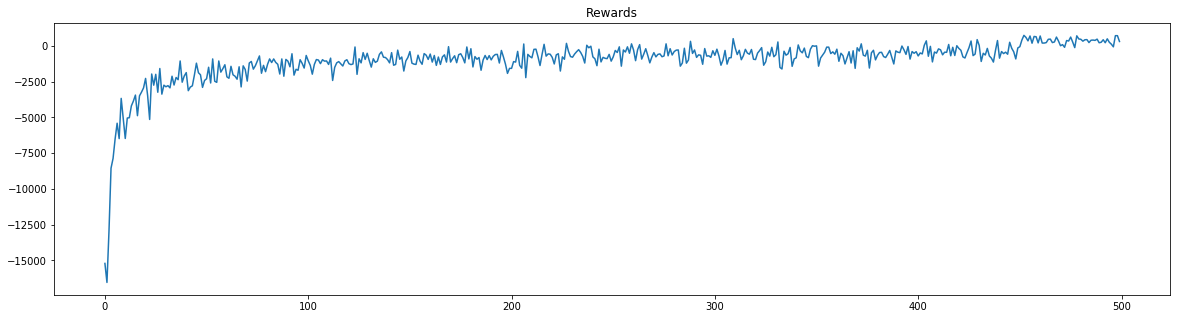

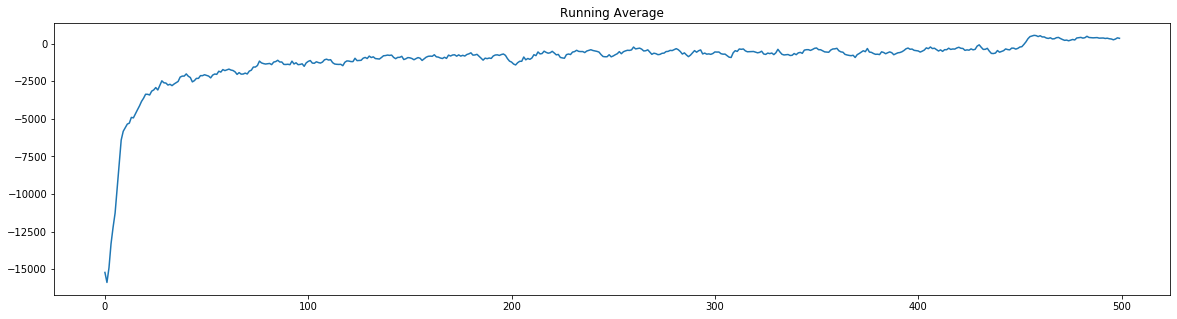

In [62]:
import gym
import gym_tiger
import matplotlib.pyplot as plt
from experiments.qlearning.basic.utils import plot_running_avg
from experiments.qlearning.basic.qlearner_obs_act_seq.qlearner_obs_act_seq \
    import QLearnerObsActSeq, play_one
from experiments.qlearning.basic.qlearner_obs_act_seq.feature_transformer \
    import ObsActSeqFeatureTransformer


env = gym.make('Tiger-v0')
env.__init__(reward_tiger=-100, reward_gold=10, reward_listen=-1,
             max_steps_per_episode=500, obs_accuracy=.85)

ft = ObsActSeqFeatureTransformer()

model = QLearnerObsActSeq(env, ft, initial_alpha=.5, gamma=.9, alpha_decay=.4,
                          seq_len=3)

eps = 1
n = 0
done = False
ot = env.reset()

N = 500
totalrewards = np.empty(N)
for n in range(N):
    if n > (N-50):
        eps = 0
    else:
        eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(env, model, eps)
    totalrewards[n] = totalreward
    if n % (N/5) == 0:
        display(model.to_df())

print("avg reward for last 50 episodes:",
      totalrewards[-50:].mean())

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(totalrewards)
ax.set_title("Rewards")

plot_running_avg(totalrewards, window=5)

## Inspect model

In [84]:
df = model.to_df()
df[(df['BEST ACTION'] != 'LISTEN') & (
      (df['OPEN_LEFT UPDATE COUNT'] > 10)
    | (df['OPEN_RIGHT UPDATE COUNT'] > 10)
    | (df['LISTEN UPDATE COUNT'] > 10)
)].filter(regex='^((?!COUNT).)*$')

,a_t-3,o_t-2,a_t-2,o_t-1,a_t-1,o_t-0,OPEN_LEFT Q VALUE,OPEN_RIGHT Q VALUE,LISTEN Q VALUE,BEST ACTION
8,OPEN_RIGHT,GROWL_LEFT,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,58.84,-46.42,34.22,OPEN_LEFT
16,OPEN_LEFT,GROWL_RIGHT,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,63.71,-46.81,33.51,OPEN_LEFT
48,OPEN_LEFT,GROWL_LEFT,LISTEN,GROWL_LEFT,LISTEN,GROWL_LEFT,-23.3,26.75,2.44,OPEN_RIGHT
62,OPEN_RIGHT,GROWL_RIGHT,LISTEN,GROWL_LEFT,LISTEN,GROWL_LEFT,-33.52,30.48,2.23,OPEN_RIGHT
68,OPEN_RIGHT,GROWL_RIGHT,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,33.59,-29.46,2.67,OPEN_LEFT
80,OPEN_LEFT,GROWL_RIGHT,LISTEN,GROWL_LEFT,LISTEN,GROWL_LEFT,-48.46,64.13,33.63,OPEN_RIGHT
104,OPEN_LEFT,GROWL_LEFT,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,27.87,-44.82,2.38,OPEN_LEFT
127,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,71.18,-44.98,24.39,OPEN_LEFT
131,OPEN_LEFT,GROWL_RIGHT,OPEN_RIGHT,GROWL_LEFT,LISTEN,GROWL_RIGHT,-0.45,-13.14,-0.76,OPEN_LEFT
154,LISTEN,GROWL_LEFT,LISTEN,GROWL_LEFT,LISTEN,GROWL_LEFT,-40.94,76.73,27.35,OPEN_RIGHT


# TwoInARow-v0

avg reward for last 20.0 episodes: 99.2


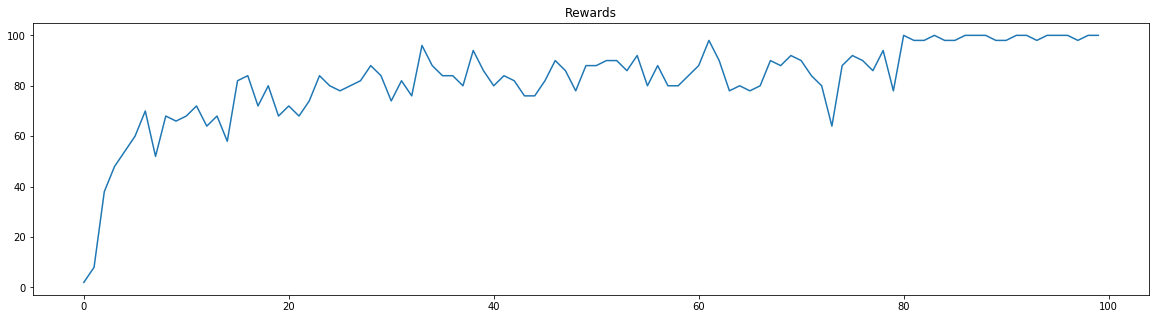

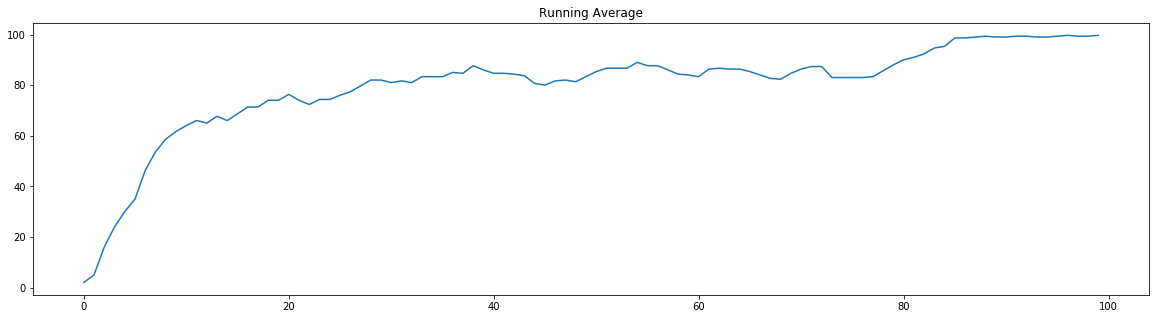

In [4]:
import gym
import gym_dummy
import matplotlib.pyplot as plt
from experiments.qlearning.basic.utils import play_one, plot_running_avg
from experiments.qlearning.basic.qlearner_obs_seq.qlearner_obs_seq \
    import QLearnerObsSeq
from experiments.qlearning.basic.qlearner_obs_seq.feature_transformer \
    import SeqFeatureTransformer

env = gym.make('TwoInARow-v0')
ft = SeqFeatureTransformer()
model = QLearnerObsSeq(env, ft, initial_alpha=.5, gamma=.9, alpha_decay=.4,
                       seq_len=2, translate=False)
eps = 1
n = 0
done = False
ot = env.reset()

N = 100
totalrewards = np.empty(N)
for n in range(N):
    if n >= N - (N/5):
        eps = 0
    else:
        eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(env, model, eps)
    totalrewards[n] = totalreward

print("avg reward for last {} episodes:".format(N/5),
      totalrewards[int(-1*(N/5)):].mean())

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(totalrewards)
ax.set_title("Rewards")

plot_running_avg(totalrewards, window=5)

In [13]:
display(model.last_n_obs)
model.predict([1])

[[0], [0]]

array([ 0.25381239, -1.88289797])